# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Select a random city and do pprint to preview response data
pprint(requests.get(query_url + "bolobo").json())

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': -2.1667, 'lon': 16.2333},
 'dt': 1619129793,
 'id': 2316748,
 'main': {'feels_like': 78.64,
          'grnd_level': 974,
          'humidity': 75,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 77.65,
          'temp_max': 77.65,
          'temp_min': 77.65},
 'name': 'Bolobo',
 'sys': {'country': 'CD', 'sunrise': 1619067111, 'sunset': 1619110493},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 178, 'gust': 2.13, 'speed': 1.95}}


In [6]:
# print("Beginning Data Retrieval \n---------------------------------")

# Create lists to store response data
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humid_list = []
cloud_list = []
windspeed_list = []
country_list = []
date_list = []

# Loop through the list of cities and get the index and city name
record = 0
set_num =1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        humid_list.append(response["main"]["humidity"])
        cloud_list.append(response["clouds"]["all"])  
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"]) 
        date_list.append(response["dt"])                
                        
        if record > 49:
            record = 0
            set_num += 1
        else:
            record += 1
        print(f"Processing Record {record} of Set {set_num} | {city}")
        
    except:
        print(f"City not found. Skipping...")
        
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
                  

Processing Record 1 of Set 1 | alibag
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | sorland
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | pitimbu
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | shimanovsk
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | sakakah
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | daoukro
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | marrakesh
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | victoria
Processing Record 23 of Set 1 | businga
Processing Record 24 of Set 1 | goias
Processing Record 25 of Set 1 | 

Processing Record 38 of Set 4 | sorong
Processing Record 39 of Set 4 | krasnyy yar
Processing Record 40 of Set 4 | beloha
Processing Record 41 of Set 4 | kyren
Processing Record 42 of Set 4 | horta
Processing Record 43 of Set 4 | elat
Processing Record 44 of Set 4 | acoyapa
Processing Record 45 of Set 4 | luena
Processing Record 46 of Set 4 | saint-augustin
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | qaanaaq
Processing Record 0 of Set 5 | laramie
City not found. Skipping...
Processing Record 1 of Set 5 | kondinskoye
Processing Record 2 of Set 5 | melbourne
Processing Record 3 of Set 5 | bhawanipatna
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | husavik
Processing Record 7 of Set 5 | grand gaube
Processing Record 8 of Set 5 | karratha
Processing Record 9 of Set 5 | rocha
Processing Record 10 of Set 5 | len

Processing Record 26 of Set 8 | tilichiki
City not found. Skipping...
Processing Record 27 of Set 8 | lieksa
Processing Record 28 of Set 8 | prince rupert
Processing Record 29 of Set 8 | batagay
Processing Record 30 of Set 8 | gombong
Processing Record 31 of Set 8 | coquimbo
Processing Record 32 of Set 8 | plouzane
City not found. Skipping...
Processing Record 33 of Set 8 | pisco
Processing Record 34 of Set 8 | havoysund
Processing Record 35 of Set 8 | bitung
Processing Record 36 of Set 8 | portalegre
Processing Record 37 of Set 8 | erenhot
Processing Record 38 of Set 8 | gedo
Processing Record 39 of Set 8 | namibe
Processing Record 40 of Set 8 | severo-yeniseyskiy
Processing Record 41 of Set 8 | atocha
Processing Record 42 of Set 8 | sosnovo-ozerskoye
Processing Record 43 of Set 8 | itarema
Processing Record 44 of Set 8 | libourne
Processing Record 45 of Set 8 | esso
Processing Record 46 of Set 8 | shingu
Processing Record 47 of Set 8 | jacmel
Processing Record 48 of Set 8 | praia da 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dataframe witht the weather data for cities:
city_weather_df = pd.DataFrame({"City":city_list, "Lat":lat_list, "Lng":lng_list, "Max Temp":max_temp_list, 
                               "Humidity":humid_list, "Cloudiness":cloud_list, "Wind Speed":windspeed_list,
                               "Country":country_list, "Date":date_list})

# Display the DataFrame
pd.options.display.float_format = '{:,.2f}'.format
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alibag,18.64,72.88,82.40,78,20,8.90,IN,1619129798
1,Barrow,71.29,-156.79,19.40,79,1,8.05,US,1619129324
2,Sørland,67.67,12.69,30.20,93,75,3.44,NO,1619129799
3,Norman Wells,65.28,-126.83,26.60,50,75,12.66,CA,1619129376
4,Pitimbu,-7.47,-34.81,78.80,100,0,6.91,BR,1619129799


In [13]:
# Check the date of data
import datetime
timestamp = datetime.datetime.fromtimestamp(1619129798)
print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

2021-04-22 15:16:38


In [8]:
# Export the city data into a .csv
city_weather_df.to_csv("output_data/cities.csv", index = False)

In [9]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.00,570.00,570.00,570.00,570.00,570.00,570.00
mean,22.05,20.86,58.37,70.92,58.25,8.46,"1,619,129,734.97"
std,33.44,90.40,20.30,22.41,37.96,6.00,256.68
min,-54.80,-175.20,-1.19,4.00,0.00,0.56,"1,619,129,023.00"
25%,-4.90,-59.01,43.03,60.00,20.00,3.78,"1,619,129,466.25"
50%,27.82,26.07,61.66,77.00,75.00,6.91,"1,619,129,858.00"
75%,50.33,102.33,75.94,87.00,96.00,11.50,"1,619,129,933.00"
max,78.22,179.32,95.00,100.00,100.00,42.08,"1,619,130,007.00"


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

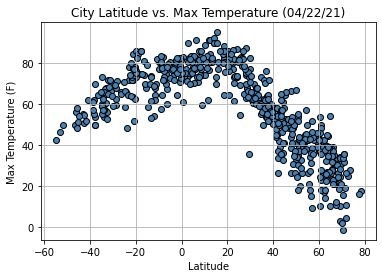

In [34]:
# Scatter plot for Latitude vs. Temperature
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (04/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Images/City Latitude vs. Max Temperature.png")

## Latitude vs. Humidity Plot

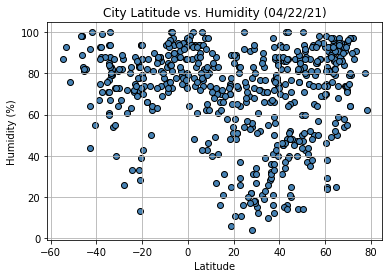

In [35]:
# Scatter plot for Latitude vs. Humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (04/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Images/City Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

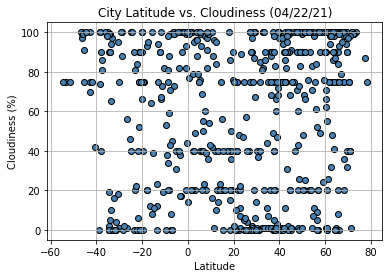

In [36]:
# Scatter plot for Latitude vs. Cloudiness
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (04/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Images/City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

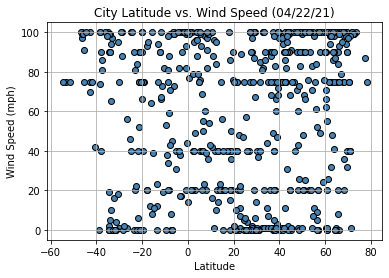

In [37]:
# Scatter plot for Latitude vs. Wind Speed
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (04/22/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Images/City Latitude vs. Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8869089836752685


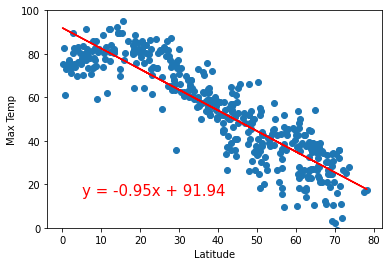

In [50]:
# Find out the city in Northern Hemisphere
city_weather_df_n = city_weather_df[city_weather_df["Lat"] > 0]

# plot the linear regression model for Northern Hemisphere - Max Temp vs. Latitude
x_values = city_weather_df_n["Lat"]
y_values = city_weather_df_n["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.ylim(0,100)

print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7191778486606527


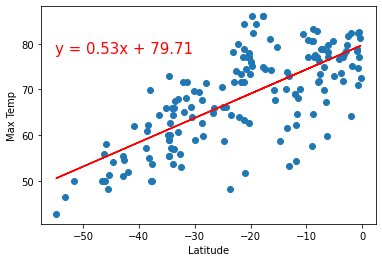

In [52]:
# Find out the city in Southern Hemisphere
city_weather_df_s = city_weather_df[city_weather_df["Lat"] < 0]

# plot the linear regression model for Southern Hemisphere - Max Temp vs. Latitude
x_values = city_weather_df_s["Lat"]
y_values = city_weather_df_s["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(-55,78),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14433621924425447


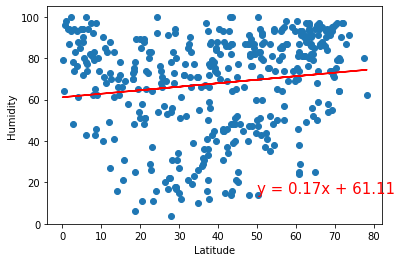

In [56]:
# plot the linear regression model for Northern Hemisphere - Humidity (%) vs. Latitude
x_values = city_weather_df_n["Lat"]
y_values = city_weather_df_n["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(0,105)

print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11274102165661273


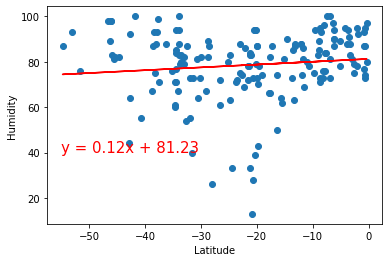

In [57]:
# plot the linear regression model for Southern Hemisphere - Humidity vs. Latitude
x_values = city_weather_df_s["Lat"]
y_values = city_weather_df_s["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1960447231585971


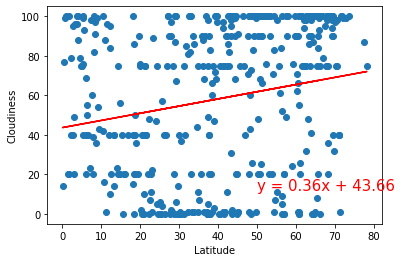

In [59]:
# plot the linear regression model for Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = city_weather_df_n["Lat"]
y_values = city_weather_df_n["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.007180097164820863


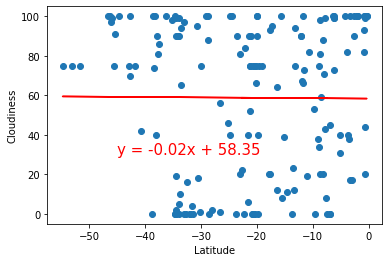

In [61]:
# plot the linear regression model for Southern Hemisphere - Cloudiness vs. Latitude
x_values = city_weather_df_s["Lat"]
y_values = city_weather_df_s["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05190577981147897


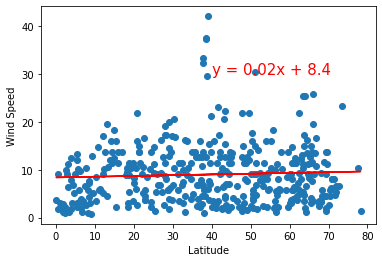

In [63]:
# plot the linear regression model for Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = city_weather_df_n["Lat"]
y_values = city_weather_df_n["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11871389762982291


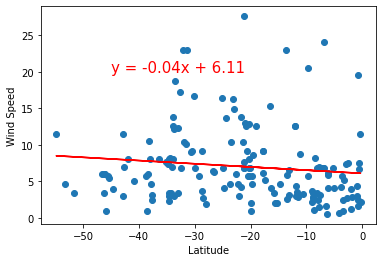

In [65]:
# plot the linear regression model for Southern Hemisphere - Wind Speed vs. Latitude
x_values = city_weather_df_s["Lat"]
y_values = city_weather_df_s["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")
plt.show()